In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [52]:
# Load the dataset
file_path = 'Cleaned_Steam_Dataset.xlsx'
data = pd.read_excel(file_path)

In [54]:
data

,Title,Game's Age (Days),Price,Developer,Publisher,Followers,User Review (On a scale of 1 to 7),User Reviews Count,Net Revenue (in million $),User Ratings
0,Red Dead Redemption 2,1786,99.99,Rockstar Games,Rockstar Games,800322,6,578915,1100,9
1,Grand Theft Auto V,3482,29.99,Rockstar North,Rockstar Games,3240105,6,1728306,990,9
2,ELDEN RING,974,59.99,"FromSoftware, Inc.","FromSoftware, Inc., Bandai Namco Entertainment",1011933,6,712931,820,9
3,Black Myth: Wukong,67,59.99,Game Science,Game Science,1222760,7,709346,820,10
4,Cyberpunk 2077,1416,59.99,CD PROJEKT RED,CD PROJEKT RED,1437630,6,687290,790,9
...,...,...,...,...,...,...,...,...,...,...
254,NBA 2K21,1200,49.99,Visual Concepts,2K,300000,2,50000,2,6
255,Postal III,4000,10.99,Trashmasters,Akella,18000,1,7000,1,6
256,Ride to Hell: Retribution,3700,19.99,Eutechnyx,Deep Silver,12000,1,5000,1,5
257,War Z,3900,5.99,Hammerpoint Interactive,OP Productions,22000,1,12000,1,6


In [56]:
# Inspect the dataset structure
print(data.head())

                   Title  Game's Age (Days)  Price           Developer  \
0  Red Dead Redemption 2               1786  99.99      Rockstar Games   
1     Grand Theft Auto V               3482  29.99      Rockstar North   
2             ELDEN RING                974  59.99  FromSoftware, Inc.   
3     Black Myth: Wukong                 67  59.99        Game Science   
4         Cyberpunk 2077               1416  59.99      CD PROJEKT RED   

                                        Publisher  Followers  \
0                                  Rockstar Games     800322   
1                                  Rockstar Games    3240105   
2  FromSoftware, Inc., Bandai Namco Entertainment    1011933   
3                                    Game Science    1222760   
4                                  CD PROJEKT RED    1437630   

   User Review (On a scale of 1 to 7)  User Reviews Count  \
0                                   6              578915   
1                                   6           

In [58]:
# Define target and features
# Target variable: User Ratings
# Features: Select relevant columns
features = ['Game\'s Age (Days)', 'Price', 'User Review (On a scale of 1 to 7)', 
            'User Reviews Count', 'Followers', 'Net Revenue (in million $)']
target = 'User Ratings'

In [60]:
# Preprocessing
X = data[features]
y = data[target]

In [62]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [64]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [66]:
# Train the Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [68]:
# Evaluate the model
y_pred = nb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8846153846153846

Classification Report:
               precision    recall  f1-score   support

           5       0.00      0.00      0.00         0
           6       1.00      0.70      0.82        10
           7       1.00      0.80      0.89         5
           8       0.00      0.00      0.00         1
           9       0.86      1.00      0.93        25
          10       1.00      0.91      0.95        11

    accuracy                           0.88        52
   macro avg       0.64      0.57      0.60        52
weighted avg       0.91      0.88      0.89        52



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/s

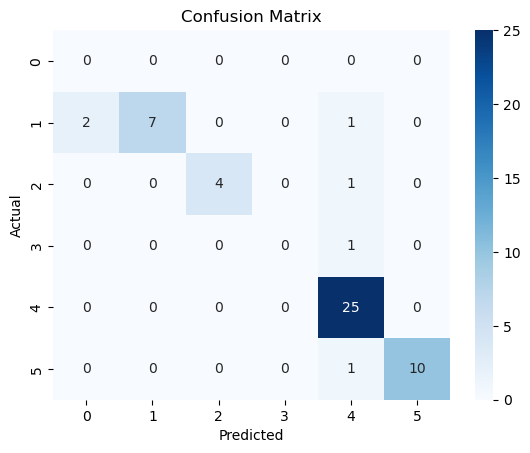

In [70]:
# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [72]:
# Predicting the class label of a new observation
new_observation = [[365, 59.99, 3, 5000000, 6, 100000]]  # Ensure this matches the feature structure
new_observation_scaled = scaler.transform(new_observation)  # Apply the same scaling as training data
predicted_class = nb_classifier.predict(new_observation_scaled)
predicted_prob = nb_classifier.predict_proba(new_observation_scaled)
print(f"Predicted Class: {predicted_class[0]}")
print(f"Predicted Probabilities: {predicted_prob}")

Predicted Class: 9
Predicted Probabilities: [[0. 0. 0. 0. 0. 1. 0.]]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
Explanation of Each Value:
365: Game's age in days (1 year old).
59.99: Price of the game in dollars.
3: Encoded developer (a specific developer from your dataset after encoding).
5: Encoded publisher (a specific publisher from your dataset after encoding).
5000000: Number of followers for the game.
6: User review score on a scale of 1 to 7.
10000: Number of user reviews.
800: Net revenue in millions of dollars.